# <font color='blue'> A Case Study on Lending Club


- Lending Club LendingClub is a peer-to-peer lending company headquartered in San Francisco, California and it provides loans to borrowers, but a lot of borrowers default, that is they do not return the borrowed amount along with accumulated interest back to the lenders.
- Such defaults results in financial loss to the businesses or lenders.
- The purpose of this case study is to identify some of the prominent factors or the driving variables which can help understanding borrowers who have higher probability of defaulting.
- In this case study , driving variables  have been analyzed and identified from the data 

 ## Importing Libraries required


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Importing data

In [16]:
df_loan = pd.read_csv("loan.csv")
df_colums = pd.read_excel("Data_Dictionary.xlsx")

In [17]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
 # deifinitions of the variables given in the table

df_colums

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


##Cleaning the data

###Checking whether all columns are present in both loan and loan column definition dataset so that it becomes easier for analysis

In [19]:
#removing any nulls collums in the data

df_colums=df_colums.dropna(1,"all")


In [20]:
#difference of columns in given data and first column of definition table

set(df_loan.columns) - set(df_colums["LoanStatNew"])

{'total_rev_hi_lim', 'verification_status_joint'}

###The columns {'total_rev_hi_lim', 'verification_status_joint'} are not present in the data definition so we can drop them

In [21]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)

###Dropping all the columns where all the values present in it are null

In [22]:
df_loan=df_loan.dropna(1,how="all")

###Shape of the data after dropping the columns

In [23]:
df_loan.shape

(39717, 57)

###Checking total number of nulls present in each column

In [24]:
df_loan.isna().sum()[df_loan.isna().sum() > 0]


emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

###Removing outliers (removing columns having high null values)

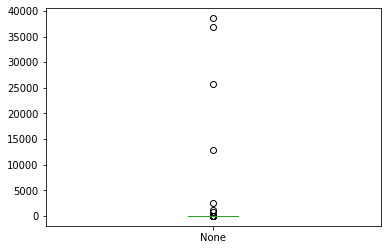

In [25]:
#by plotting a boxplot we can infer  columns having very high null values

df_loan.isna().sum().plot.box()

###Follwing columns have high null values 
{ 'desc' 'mths_since_last_record' 'next_pymnt_d' 'mths_since_last_delinq' }

In [26]:
# droping all outliers in box plot

df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],1)

###Dropping rows having high null values in the columns i.e 'pub_rec_bankruptcies' 'emp_title' 'emp_length'

In [32]:
# removing null values 

df_loan = df_loan[~df_loan.emp_length.isna()]
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]
df_loan=df_loan[~df_loan.emp_title.isna()]


### Checking for any left over null values







In [33]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 


title                          9
revol_util                    46
last_pymnt_d                  64
collections_12_mths_ex_med     2
chargeoff_within_12_mths       2
dtype: int64

In [34]:
# the columns with null values are removed

df_loan = df_loan[~df_loan["revol_util"].isna()]
df_loan = df_loan[~df_loan["last_pymnt_d"].isna()]
df_loan = df_loan[~df_loan["collections_12_mths_ex_med"].isna()]
df_loan = df_loan[~df_loan["chargeoff_within_12_mths"].isna()]


###Checking if all Columns with  Null Values are removed

In [35]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 


title    9
dtype: int64

In [36]:
df_loan.shape

(36440, 53)

###List of Columns we will be considering for our  for analysis

In [37]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#Data Analysis

##Univariate Analysis

###id :A unique ID for the loan listing.
###member_id : A unique company assigned Id for the borrower member

We conert both of them into String Datatype so it becomes easier for Manipulation

In [38]:
df_loan["id"]= df_loan["id"].astype('string')

df_loan["member_id"] = df_loan["member_id"].astype('string')

###loan_amnt : The listed amount of the loan applied for by the borrower

In [39]:
df_loan["loan_amnt"].describe()

count    36440.000000
mean     11307.469813
std       7433.913088
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

###Plotting the Graph

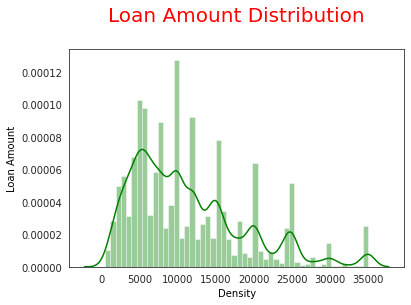

In [54]:
#ploting the graph 

sns.set_style("white")
sns.distplot(df_loan.loan_amnt, color="g")

# Labeling the Axes

plt.xlabel("Density", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Loan Amount", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})

# Adding and formatting title

plt.title("Loan Amount Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

plt.show()

##Observations

1.Loan applied lies between 500 to 35000

2.By this graph we got to understand that most of the loan borrowers need money under 15000



...............................................................................................................................................................

funded_amnt : The total amount committed to that loan 

funded_amnt lies in between 500 to 35000 as observed from the graph

In [42]:
df_loan["funded_amnt"].describe()

count    36440.000000
mean     11032.435510
std       7166.296584
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

###Derived Metrics:
 New column added "loan_approval" = percentage  of money approved to them of what they asked

In [56]:
df_loan["loan_approval"] = df_loan["funded_amnt"] / df_loan["loan_amnt"] * 100

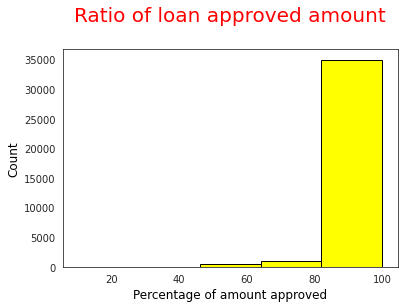

In [46]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center

plt.hist(df_loan["loan_approval"], bins=5, align='mid', edgecolor='Black',color='yellow')

# Adding and formatting title

plt.title("Ratio of Approved Loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes

plt.xlabel("Percentage of amount approved", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

##Observations

1.From the Grapgh we can see that the majority of the people who applid  were approved

................................................................................................................................................................

funded_amnt_inv : The total amount committed by investors for that loan

In [47]:
df_loan["funded_amnt_inv"].describe()

count    36440.000000
mean     10601.145507
std       7072.501327
min          0.000000
25%       5000.000000
50%       9200.010000
75%      14503.547935
max      35000.000000
Name: funded_amnt_inv, dtype: float64

##Derived Metrics

In [48]:
# a new Column where funded amount be investors is 0 

zero_inv=df_loan[df_loan["funded_amnt_inv"] == 0] 


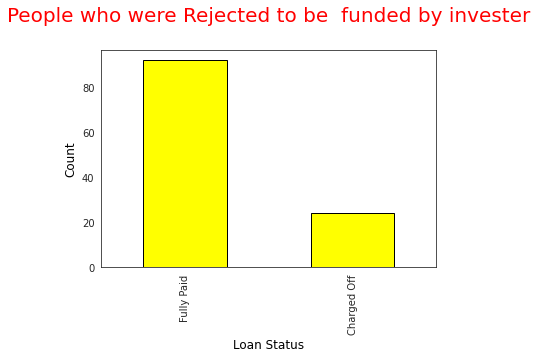

In [52]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
zero_inv.loan_status.value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("People who were Rejected to be  funded by invester\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

1.funded_amnt_inv lies between 0 to 35000 but there are 129 records with 0 this might be because investor did want to invest

2.In the 129 records majority of the people paid off the loan so it is better to provide them loans and reduce the business loss

................................................................................................................................................................

term : The number of payments on the loan. Values are in months and can be either 36 or 60

In [57]:
df_loan["term"].value_counts()

 36 months    26381
 60 months    10059
Name: term, dtype: int64

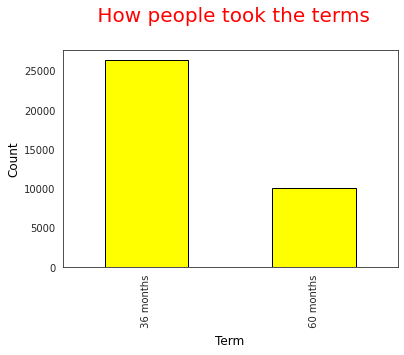

In [58]:
# plotting bar chart and setting bar aligning it to center
df_loan["term"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title(" How people took the terms\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

##Observations

There are two values 36 and 60 months
 We can understand that majority of the people have took the 36 months term period

................................................................................................................................................................

int_rate : Interest Rate on the loan

In [59]:
df_loan["int_rate"].value_counts() 


10.99%    901
13.49%    785
11.49%    768
7.51%     731
7.88%     674
         ... 
18.72%      1
16.20%      1
17.46%      1
17.54%      1
12.49%      1
Name: int_rate, Length: 333, dtype: int64

we have convert the data type from string to float

In [60]:
# creating a generic function which will remove '%' and convert into flaot

def remove_last_char_tofloat(x): 
    x = x[:-1]
    return float(x) 

In [61]:
#applying the function to columns


df_loan["int_rate"]=df_loan["int_rate"].apply(remove_last_char_tofloat)

In [62]:
df_loan["int_rate"].dtype

dtype('float64')

In [63]:
df_loan["int_rate"].describe()

count    36440.000000
mean        12.074409
std          3.734976
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

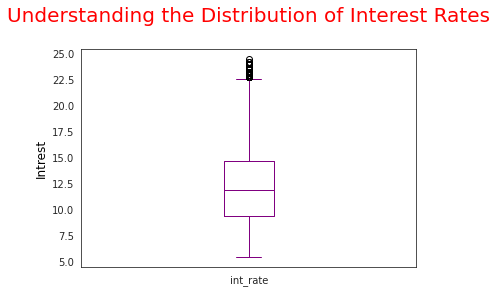

In [66]:
# plotting bar chart and setting bar aligning it to center
df_loan["int_rate"].plot.box(color='purple')

# Adding and formatting title
plt.title("Understanding the Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.ylabel("Intrest", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

1.int_rate lies between 5% to 24%

2.High interest implies high risk and vice versa

3.From the graph we can say majority of the people are lying in between 10 to 15 percent interest rate

................................................................................................................................................................

installment : The monthly payment owed by the borrower if the loan originates.

In [67]:
df_loan["installment"].describe()


count    36440.000000
mean       326.169811
std        207.378513
min         16.080000
25%        168.900000
50%        283.280000
75%        432.220000
max       1305.190000
Name: installment, dtype: float64

In [69]:
## removing the outliers 

df_loan= df_loan[df_loan["installment"] < 700] 

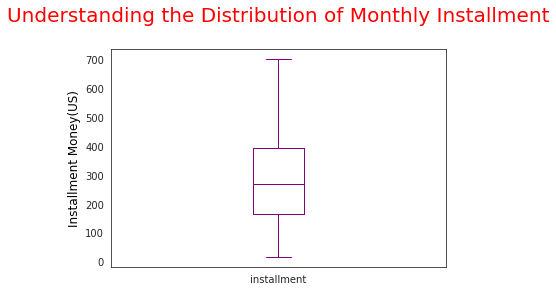

In [71]:
# plotting bar chart and setting bar aligning it to center
df_loan["installment"].plot.box(color='purple')

# Adding and formatting title
plt.title("Understanding the Distribution of Monthly Installment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.ylabel("Installment Money(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

1.Installment lies between 15 to 1305 where 75 percentile data lies under 430

2.This implies that there are some outliers who are paying high amount in one installment

3.IQR(Inter quartile range) is 263

4.Majority of the people have monthly installment between 160 and 430


................................................................................................................................................................

grade : LC assigned loan grade

In [72]:
df_loan["grade"].value_counts()

B    10423
A     8980
C     7102
D     4452
E     2251
F      760
G      212
Name: grade, dtype: int64

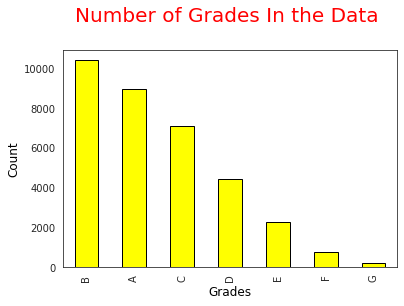

In [74]:
# plotting bar chart and setting bar aligning it to center
df_loan["grade"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Number of Grades In the Data \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

B grade loans are nearly 12020 which is the highest number of loan given

................................................................................................................................................................

sub_grade : LC assigned loan subgrade

In [75]:
df_loan["sub_grade"].value_counts()


A4    2576
B3    2497
A5    2457
B5    2375
B4    2176
C1    1844
B2    1782
C2    1780
A3    1607
B1    1593
C3    1369
A2    1335
D2    1160
C4    1080
C5    1029
A1    1005
D3     990
D4     814
D1     770
D5     718
E1     628
E2     535
E3     440
E4     358
E5     290
F1     243
F2     190
F3     136
F4     117
F5      74
G1      66
G2      52
G4      42
G3      34
G5      18
Name: sub_grade, dtype: int64

###Observations

Each grade is again divided into 5 subgrades like A1,A2,A3,A4,A5


................................................................................................................................................................

emp_title : The job title of the person applying for the loan.

In [76]:
df_loan["emp_title"].value_counts()
df_loan["emp_title"].isna().sum()
df_loan["emp_title"].value_counts().describe()

count    26684.000000
mean         1.280917
std          1.923394
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        116.000000
Name: emp_title, dtype: float64

###Observations

1.Majority of the people are from different companies and 75 percentile of data are unique, so we cannot find much insights from this data

...............................................................................................................................................................

emp_length : Employment length in years.

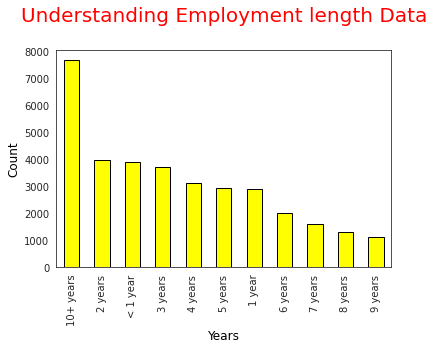

In [77]:
# plotting bar chart and setting bar aligning it to center
df_loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Employment length Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

In [83]:
def clean_emp_year(x):
    x =  x.replace("years" , "")
    x =  x.replace("year" , "")
    x =  x.replace("< 1" , "0")
    x =  x.replace("+" , "")
    return int(x)

In [ ]:
#cleaning the data

df_loan["emp_length"] = df_loan["emp_length"].apply(clean_emp_year)

###Observations

1.Possible values are between 0 and 10 where 0 denotes less than one year and 10 denotes ten or more years.

2.1075 null values are present

3.From the graph we can see that people having 10+ year experience are majority of applicants of the loan

................................................................................................................................................................

home_ownership : The home ownership status provided by the borrower during registration.



In [87]:
# droping the rows with "OTHER"
df_loan = df_loan[~(df_loan["home_ownership"] == "OTHER")]

In [88]:
# droping the rows with "NONE"
df_loan = df_loan[~(df_loan["home_ownership"] == "NONE")]

function defined is to find the percentage of home ownership

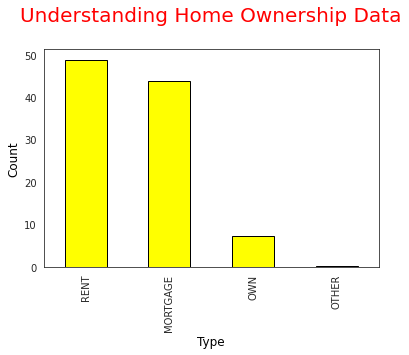

In [89]:
# plotting bar chart and setting bar aligning it to center
df_loan["home_ownership"].value_counts().apply(lambda x : x /df_loan["home_ownership"].shape[0]*100).plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Home Ownership Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

1.Majority of the people who applied for the loan are living on rent or mortgage

2.This implies that 80% are not having full home ownership

................................................................................................................................................................

annual_inc : The self-reported annual income provided by the borrower during registration.

Maximum is very high and there are two oultliers
So we can drop these records highter than > 30 lakhs

In [90]:
df_loan["annual_inc"].max()

6000000.0

In [91]:
df_loan["annual_inc"].min()

4000.0

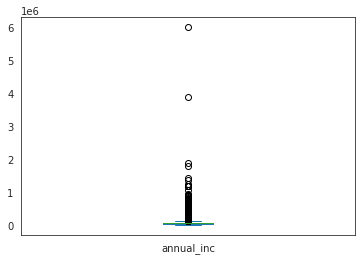

In [92]:
df_loan["annual_inc"].plot.box()

In [94]:
 #df shape before droping the values

df_loan.shape

(34180, 54)

In [96]:
#finding the 90th percentile of the Annual income

np.percentile(df_loan["annual_inc"],90)

109200.0

In [98]:
#df shape after droping the values

df_loan = df_loan[df_loan["annual_inc"] < 116000.0]  
df_loan.shape


(31374, 54)

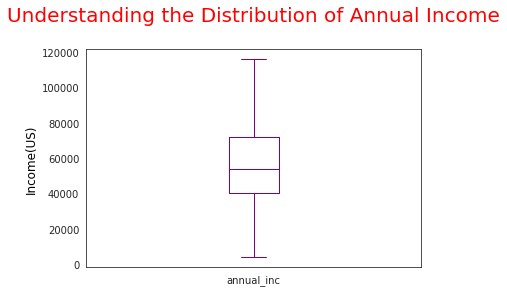

In [99]:
# plotting bar chart and setting bar aligning it to center
df_loan["annual_inc"].plot.box(color='purple')

# Adding and formatting title
plt.title("Understanding the Distribution of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.ylabel("Income(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

Majority of the people's annual income is lies between 40000 to 80000

................................................................................................................................................................

verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

function defined is to verify the verificatio status is verified or not 

Text(0, 0.5, 'Count')

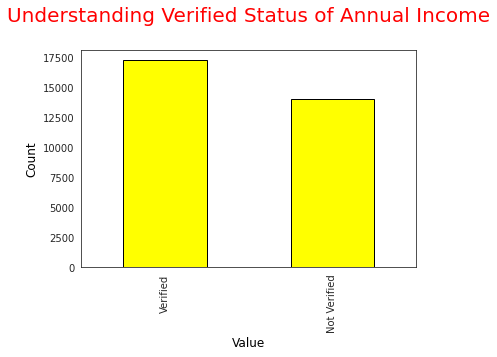

In [100]:
# plotting bar chart and setting bar aligning it to center
df_loan["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x).value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Verified Status of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

###Observations

1.Majority of the data for income is verified(65%)

2.But nearly 35% data about income is not verfied


................................................................................................................................................................

issue_d : The month which the loan was funded

In [101]:
df_loan["issue_d"].value_counts()

Dec-11    1818
Nov-11    1714
Oct-11    1584
Sep-11    1584
Aug-11    1520
Jul-11    1497
Jun-11    1455
May-11    1381
Apr-11    1259
Jan-11    1143
Mar-11    1139
Feb-11    1031
Dec-10    1024
Jul-10     958
Nov-10     936
Oct-10     922
Aug-10     914
Sep-10     904
Jun-10     864
May-10     750
Apr-10     670
Mar-10     572
Feb-10     484
Nov-09     458
Dec-09     425
Jan-10     425
Oct-09     421
Sep-09     387
Aug-09     353
Jul-09     317
Jun-09     305
May-09     272
Mar-09     254
Apr-09     250
Feb-09     229
Jan-09     205
Dec-08     183
Nov-08     158
Apr-08     132
Mar-08      97
Oct-08      78
Jul-08      75
May-08      66
Aug-08      60
Jun-08      57
Sep-08      28
Feb-08       6
Jan-08       6
Dec-07       2
Nov-07       1
Oct-07       1
Name: issue_d, dtype: int64

In [102]:
df_loan["issue_d_month"]= df_loan["issue_d"].apply(lambda x : x[:3])

In [103]:
df_loan["issue_d_year"] = df_loan["issue_d"].apply(lambda x : x[4:])

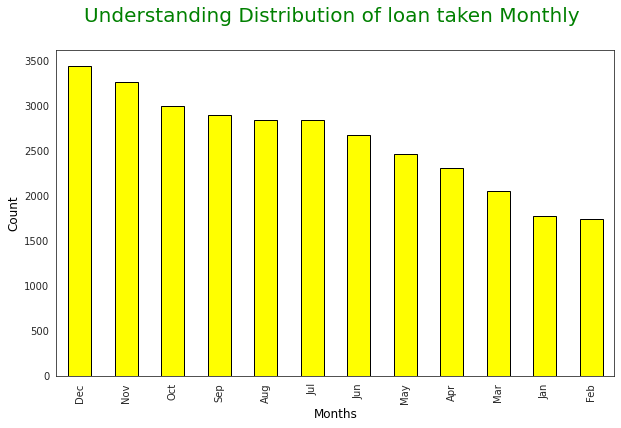

In [104]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_month"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken Monthly \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

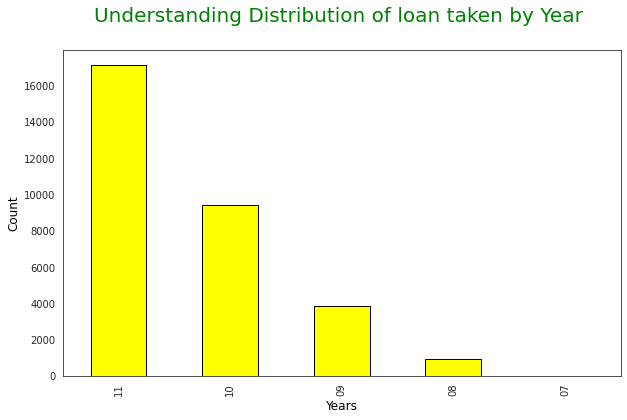

In [105]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_year"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken by Year \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

1.Majority of the people have taken loan in the end of the year
2. We need to promote other months also to increase profits
3. Majority of the people have taken loan in 2011 and after every year, the number of loan borrowers have increased

................................................................................................................................................................

loan_status : Current status of the loan

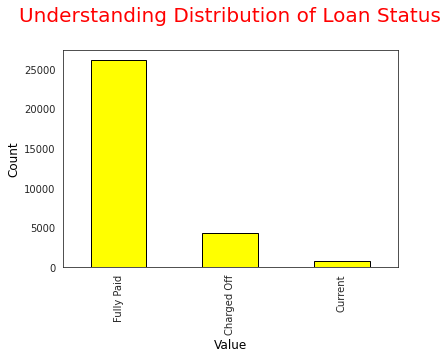

In [106]:
# plotting bar chart and setting bar aligning it to center
df_loan["loan_status"].value_counts().plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Understanding Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

In [108]:

#removing the current values rows because they can pay full ammount so we can't find much Insigths
n_loan=df_loan[df_loan["loan_status"] != "Current"] 


###Observations

1.There are three category of loan status

2.Fully Paid,Charged Off ,Current
We are removing current column because we cannot get much insight with these data and create a new column n_loan

................................................................................................................................................................

In [109]:
df_loan["pymnt_plan"].value_counts()

n    31374
Name: pymnt_plan, dtype: int64

In [110]:
df_loan = df_loan.drop("pymnt_plan" ,1)
df_loan.shape

(31374, 55)

................................................................................................................................................................

url : URL for the LC page with listing data.

this column is not use full for getting insights to reduces the risk

In [111]:
df_loan["url"][1]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

In [112]:
df_loan = df_loan.drop("url",1)

In [113]:
df_loan.shape

(31374, 54)

................................................................................................................................................................

purpose : A category provided by the borrower for the loan request.

different categorys like wedding,car etc
14 distict categorys

In [114]:
df_loan["purpose"].value_counts()

debt_consolidation    15027
credit_card            4043
other                  3212
home_improvement       2094
major_purchase         1795
car                    1340
small_business         1128
wedding                 786
medical                 559
moving                  469
vacation                313
house                   282
educational             254
renewable_energy         72
Name: purpose, dtype: int64

In [115]:
 # removing minimum number of columns

df_loan = df_loan[~(df_loan["purpose"] == "renewable_energy")]

................................................................................................................................................................

title :The loan title provided by the borrower

Purpose he is taking the loan
Already we have category of the loan and majority of the data that is 75% percentile data is unique values
So we can drop this columns

In [116]:
df_loan["title"].value_counts().describe()

count    15705.00000
mean         1.99255
std         20.12015
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max       1749.00000
Name: title, dtype: float64

In [117]:
df_loan = df_loan.drop("title",1)

................................................................................................................................................................

zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.

In [118]:
df_loan["zip_code"].value_counts()

112xx    424
945xx    423
606xx    416
100xx    405
070xx    361
        ... 
332xx      1
884xx      1
461xx      1
093xx      1
753xx      1
Name: zip_code, Length: 798, dtype: int64

###Observations

Highest loans are taken from zip_code with 112XX
Half of the zip_codes were unique zip_codes

................................................................................................................................................................

addr_state : The state provided by the borrower in the loan application

In [119]:
df_loan["addr_state"].value_counts().describe()

count      48.000000
mean      652.125000
std       954.335251
min         1.000000
25%       135.750000
50%       365.000000
75%       709.000000
max      5493.000000
Name: addr_state, dtype: float64

In [120]:
df_loan["addr_state"].value_counts().describe()

count      48.000000
mean      652.125000
std       954.335251
min         1.000000
25%       135.750000
50%       365.000000
75%       709.000000
max      5493.000000
Name: addr_state, dtype: float64

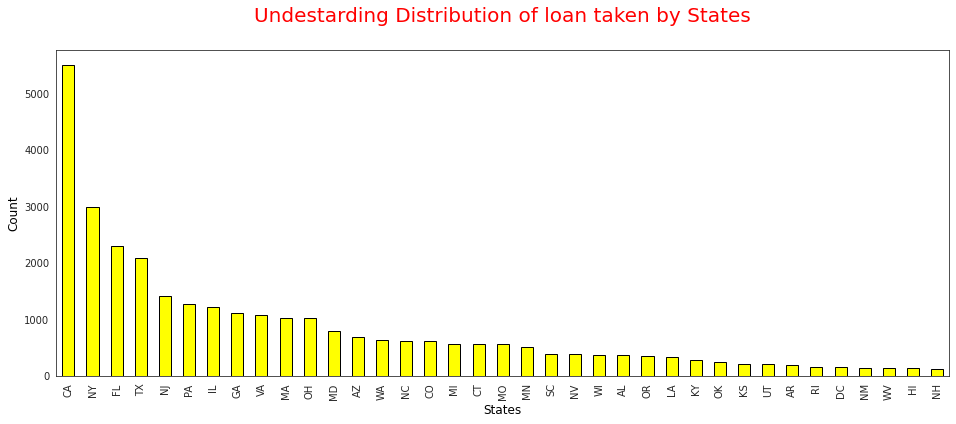

In [122]:
plt.figure(figsize = (16,6))

# plotting bar chart and setting bar aligning it to center
df_loan["addr_state"].value_counts()[df_loan["addr_state"].value_counts() > 117].plot.bar(align='center', edgecolor='Black',color='yellow')

# Adding and formatting title
plt.title("Undestarding Distribution of loan taken by States\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

###Observations

California state has highest number of loan count
Need to promote loans in other states as well to increase profit
We have some states with only 3 loans also we can avoid that states

................................................................................................................................................................

dti :A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [123]:
df_loan["dti"].describe()

count    31302.000000
mean        13.671982
std          6.664881
min          0.000000
25%          8.610000
50%         13.820000
75%         18.990000
max         29.990000
Name: dti, dtype: float64

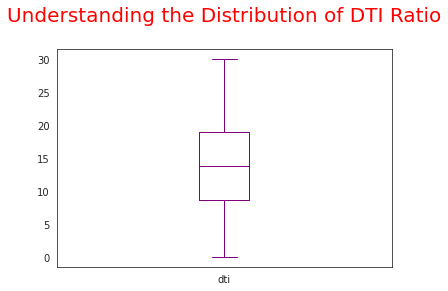

In [124]:
# plotting bar chart and setting bar aligning it to center
df_loan["dti"].plot.box(color='purple')

# Adding and formatting title
plt.title("Understanding the Distribution of DTI Ratio\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})


plt.show()

###Observation

Here dti ratio lies between 0 to 29.0 whereas as maximum dti ratio lies between 10 to 20

................................................................................................................................................................

delinq_2yrs : The number of 30+ days past-due incidences of delinquency(neglect of one's duty) in the borrower's credit file for the past 2 years



In [125]:
df_loan["delinq_2yrs"].describe()

count    31302.000000
mean         0.143218
std          0.488746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [126]:
df_loan["delinq_2yrs"].value_counts()

0     27982
1      2550
2       520
3       171
4        45
5        17
6        10
7         4
8         2
11        1
Name: delinq_2yrs, dtype: int64

###Observations

here maximum are 0 (approximatly 31,967 are 0)
so we remove these columns

................................................................................................................................................................

earliest_cr_line : The month the borrower's earliest reported credit line was opened

In [127]:
df_loan["earliest_cr_line"].value_counts()

Oct-99    309
Nov-98    307
Dec-98    290
Oct-00    286
Nov-00    283
         ... 
Dec-50      1
Jan-68      1
Aug-73      1
Aug-68      1
Jan-72      1
Name: earliest_cr_line, Length: 498, dtype: int64

In [128]:
df_loan["earliest_cr_line_year"]=df_loan["earliest_cr_line"].apply(lambda x : x[-2:])

In [129]:
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].apply(lambda x : x[:3])

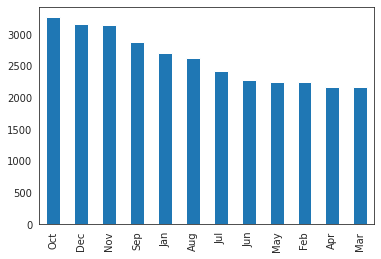

In [130]:
df_loan["earliest_cr_line"].value_counts().plot.bar()

###Observations

given with year so we need to split months with year
oct month maximum people opened credit line
year end is were maximum times people opened credit line


...................................................................................................................................................................

inq_last_6mths': The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

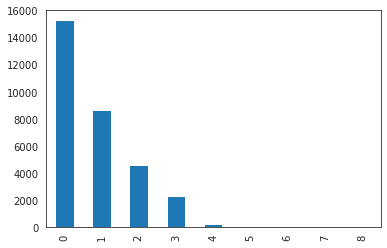

In [131]:
df_loan["inq_last_6mths"].value_counts().plot.bar()

Datatype is int
No:of null value - 0
From the graph we get to understand majority of the people have no inquiries

................................................................................................................................................................

open_acc :The number of open credit lines in the borrower's credit file.

Datatype is int
Number of null value - 0

In [132]:
df_loan["open_acc"].describe()


count    31302.000000
mean         9.098780
std          4.275072
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: open_acc, dtype: float64

................................................................................................................................................................

total_acc :The total number of credit lines currently in the borrower's credit file
Datatype is object
No:of null value - 0

In [133]:
df_loan["total_acc"].value_counts()

14    1227
15    1225
17    1219
16    1200
18    1176
      ... 
81       1
78       1
72       1
87       1
2        1
Name: total_acc, Length: 77, dtype: int64

.....................................................................................................................................................................

initial_list_status :The initial listing status of the loan

 Possible values are – W, F

Datatype is int

No:of null value - 0

This is not helpful

......................................................................................................................................................................

In [134]:
df_loan["initial_list_status"].value_counts()

f    31302
Name: initial_list_status, dtype: int64

In [135]:
df_loan=df_loan.drop("initial_list_status",1)

In [136]:
df_loan.shape #current shape ofter droping the columns

(31302, 53)

................................................................................................................................................................

out_prncp:Remaining outstanding principal for total amount funded

Datatype is float

No:of null value - 0

In [137]:
df_loan["out_prncp"].value_counts()

0.00       30429
2963.24        2
2277.11        2
1972.60        2
1716.30        1
           ...  
2907.99        1
1835.03        1
720.93         1
1990.77        1
79.24          1
Name: out_prncp, Length: 871, dtype: int64

...................................................................................................................................................................

out_prncp_inv:Remaining outstanding principal for portion of total amount funded by investors

Datatype is float

No:of null value - 0

Similar to column 31, so can remove

In [138]:
df_loan=df_loan.drop("out_prncp_inv",1)

In [139]:
df_loan.shape # current shape ofter droping the columns

(31302, 52)

................................................................................................................................................................

total_pymnt:Payments received to date for total amount funded

Datatype is int

No:of null value - 0

need to check outlier

In [140]:
df_loan["out_prncp"].value_counts()

0.00       30429
2963.24        2
2277.11        2
1972.60        2
1716.30        1
           ...  
2907.99        1
1835.03        1
720.93         1
1990.77        1
79.24          1
Name: out_prncp, Length: 871, dtype: int64

................................................................................................................................................................

total_pymnt_inv:Payments received to date for portion of total amount funded by investors

Datatype is int

No:of null value - 0

need to remove 

In [141]:
df_loan=df_loan.drop("total_pymnt_inv",1)

In [142]:
df_loan.shape # current shape ofter droping the columns


(31302, 51)

.......................................................................................................................................................................

total_rec_prncp:Principal received to date

Datatype is float

No:of null value - 0

need to remove 


In [143]:
df_loan=df_loan.drop("total_rec_prncp",1)

In [144]:
df_loan.shape # current shape ofter droping the columns

(31302, 50)

total_rec_int:Interest received to date

Datatype is float

No:of null value - 0

In [145]:
df_loan["total_rec_int"].value_counts()

1196.57    23
1784.23    15
717.95     15
1148.14    14
514.52     13
           ..
175.68      1
7607.56     1
1659.06     1
1397.18     1
609.26      1
Name: total_rec_int, Length: 27988, dtype: int64

....................................................................................................................................................................

total_rec_late_fee : Late fees received to date

Datatype is int

No:of null value - 0

In [146]:
df_loan["total_rec_late_fee"].value_counts()

0.000000     29747
15.000000      209
15.000000       47
30.000000       45
15.000000       37
             ...  
14.956954        1
14.972761        1
20.042776        1
44.905755        1
52.262227        1
Name: total_rec_late_fee, Length: 982, dtype: int64

................................................................................................................................................................

recoveries:post charge off gross recovery

Datatype is int

No:of null value - 0

In [147]:
df_loan[df_loan["recoveries"] > 0]["recoveries"].describe()

count     3222.000000
mean       717.993665
std       1458.705723
min          6.300000
25%        101.260000
50%        300.305000
75%        710.800000
max      21810.310000
Name: recoveries, dtype: float64

................................................................................................................................................................

collection_recovery_fee:post charge off collection fee

Datatype is int

No:of null value - 0

some relation with column 39

In [148]:
df_loan["collection_recovery_fee"].value_counts()


0.0000      28423
1.2000          9
2.0000          9
1.6900          8
2.0200          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
668.3600        1
Name: collection_recovery_fee, Length: 2028, dtype: int64

................................................................................................................................................................

last_pymnt_d:Last month payment was received

Datatype is object

No:of null value - 71



In [149]:
df_loan["last_pymnt_d"].value_counts()

May-16    969
Mar-13    824
Dec-14    755
May-13    730
Mar-12    698
         ... 
Aug-08      5
Sep-08      5
May-08      4
Nov-08      4
Jun-08      2
Name: last_pymnt_d, Length: 97, dtype: int64

In [150]:
df_loan["last_pymnt_d_year"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[-2:])

In [151]:
df_loan["last_pymnt_d"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[:3])

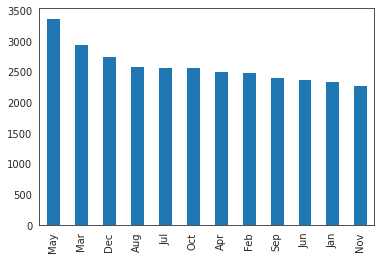

In [152]:
df_loan["last_pymnt_d"].value_counts().plot.bar()

###Observations

May is highest people payed there last month payment

...............................................................................................................................................................

last_pymnt_amnt: Last total payment amount received

Datatype is int

No:of null value - 0

In [153]:
df_loan["last_pymnt_amnt"].describe()

count    31302.000000
mean      2341.984225
std       3708.433174
min          0.010000
25%        209.887500
50%        494.520000
75%       3035.037500
max      30340.500000
Name: last_pymnt_amnt, dtype: float64

..................................................................................................................................................................

last_credit_pull_d:The most recent month LC pulled credit for this loan

Datatype is object

No:of null value - 2

................................................................................................................................................................

collections_12_mths_ex_med:Number of collections in 12 months excluding medical collections

Datatype is int

No:of null value - 50

Can be removed - 0 value in every column

In [154]:
df_loan=df_loan.drop("collections_12_mths_ex_med",1)

In [155]:
 # current shape ofter droping the columns

df_loan.shape


(31302, 50)

................................................................................................................................................................

policy_code:

publicly available policy_code=1

new products not publicly available policy_code=2

Datatype is int

No:of null value - 0

Can be removed

In [156]:
df_loan=df_loan.drop("policy_code",1)

In [158]:
# current shape ofter droping the columns

df_loan.shape 

(31302, 49)

...............................................................................................................................................................

application_type:Indicates whether the loan is an individual application or a joint application with two co-borrowers

Datatype is object

No:of null value - 0

Can be removed - just 1 value

In [159]:
df_loan=df_loan.drop("application_type",1)

In [160]:
df_loan.shape # current shape ofter droping the columns


(31302, 48)

................................................................................................................................................................

acc_now_delinq:The number of accounts on which the borrower is now delinquent.

Datatype is int

No:of null value - 0

Can be removed - just one value -that is 0

In [161]:
df_loan=df_loan.drop("acc_now_delinq",1)


...............................................................................................................................................................

chargeoff_within_12_mths: Number of charge-offs within 12 months

Datatype is float

No:of null value - 0

Can be removed - just one value -that is 0

In [162]:
df_loan=df_loan.drop('chargeoff_within_12_mths',1)

...............................................................................................................................................................

delinq_amnt:The past-due amount owed for the accounts on which the borrower is now delinquent.

Datatype is float

No:of null value - 0

Can be removed - just one value -that is 0

In [163]:
df_loan=df_loan.drop('delinq_amnt',1)


.................................................................................................................................................................

pub_rec_bankruptcies:Number of public record bankruptcies

Datatype is float

No:of null value - 697

Useful column

tax_liens:Number of tax liens

Datatype is float

No:of null value - 39

Can be removed - just one value -that is 0

In [ ]:
df_loan = df_loan.drop('tax_liens',1)

In [178]:
Customer_data = ['delinq_2yrs', "earliest_cr_line" ,'earliest_cr_line_year' , "inq_last_6mths" , "open_acc"  , "pub_rec" , "revol_bal" , 
                            "revol_util", "total_acc","out_prncp","total_pymnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                                "last_pymnt_d",'last_pymnt_d_year',"last_pymnt_amnt","last_credit_pull_d"]

In [179]:
df_loan=df_loan.drop(Customer_data,1)

KeyError: ignored

##Summary
We have understood the data clearly
We have done the cleaning wherever required
We have done the Univariate Analysis if required for that column
We derived some important insights
We have derived some columns wherever reqired to get more informations 

In [176]:
df_loan.columns #left columns which we can do bivarient analysis



Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'loan_approval', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

In [ ]:
df_loan["loan_status"]

Bivariant Analysis


Relating Between Loan Status and Loan Amount

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Loan Amount(US)", fontsize=12)
plt.title("Loan Amount and Loan Status", fontsize=20)

plt.show()

***Insights***:

By observing the median and 3rd quartile people who have taken higher loan amount are likely to charge off

Relating Between Loan Status and Loan Term

In [ ]:
term_loanstatus = pd.crosstab(index=df_loan['term'], columns=df_loan['loan_status'], normalize=0).reset_index()
term_loanstatus

In [ ]:
#create stacked bar chart
term_loanstatus.set_index('term').plot(kind='bar', stacked=True, color=['coral','aqua'] ,figsize=(7,7))

for idx, row in term_loanstatus.iterrows():
    plt.text(idx-.05, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))

plt.xticks(rotation=0)

plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Checking Loan status by terms", fontsize=20)

plt.show()

***Insights***:

The percentage of defaulters are higher in 60 months term with about 25% charge-off whereas it is just 11% for 36 month term
So, there is a possibility that longer term loans are more risky and prone to higher default

Relating Between Loan Status and Interest Rate

In [ ]:
df_loan_intrest =df_loan.groupby('loan_status').agg({'int_rate': 'median'})

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.title("Interest Rate and Loan Status", fontsize=20)


plt.show()

***Insights***:

The interest rate in charged off were higher than that of fully paid which may be infer that higher interest rate could result in higher charge offs

Relating Between Loan Status and Home Ownership

In [ ]:
plt.figure(figsize = (7,7))


sns.countplot(x="home_ownership" ,data=df_loan, hue="loan_status" , palette="hls")
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Home Ownership and loan status", fontsize=20)


plt.show()

***Insights***:

people who have stay in rent and are in mortagage are likely to be charged off (we need to be careful while giving the loan)
people who have own house are less likely to be charged off compared to people who stay in rent and mortage

Relating Between Loan Status and monthly Installment Amount

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Installment amount(US)", fontsize=12)
plt.title("Installment and loan status", fontsize=20)


plt.show()

***Insights*** :

By observing median and 3rd quartile charged off are higher than fully paid
People with high installment amount are likely to be charged off

Relating Between Loan Status and grade of loan

In [ ]:
grade_loanstatus = pd.crosstab(index=df_loan['grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
grade_loanstatus

In [ ]:
#create stacked bar chart
grade_loanstatus.set_index('grade').plot(kind='bar', stacked=True, color=['coral','aqua'],figsize=(7,7))

for idx, row in grade_loanstatus.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plt.xlabel("Grades", fontsize=12)
plt.title("Grades and Loan Status", fontsize=20)
plt.show()

***Insights***:

Lower grade loans results in higher charge offs.
We can see as grades gets lower, charge off rate increases proportionately

Relating Between Loan Status and subgrade of loan

In [ ]:
subgrade_loanstatus = pd.crosstab(index=df_loan['sub_grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
subgrade_loanstatus.head()

In [ ]:
#create stacked bar chart

axes = subgrade_loanstatus.set_index('sub_grade').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for i, row in subgrade_loanstatus.iterrows():
    plt.text(i-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 8))
plt.xlabel("Sub-Grades", fontsize=12)
plt.title("Sub-Grades and Loan Status", fontsize=20)
plt.show()

***Insights***:

We can see as sub-grades gets lower, charge off rate increases proportionately
A1 grade is one of the best grade to give the loan

Relating Between Loan Status and Employment Experience

In [ ]:
def bucket(x): # creating buckets for getting more insights
    if(x==0):
        return "Fresher"
    elif(x>=1 and x<3):
        return "1-3"
    elif(x>=3 and x<5):
        return "3-5"
    elif(x>=5 and x<7):
        return "5-7"
    elif(x>=7 and x<10):
        return "7-10"
    elif(x>=10):
        return "10+"
        

In [ ]:
df_loan["emp_length_buckets"]=df_loan.emp_length.apply(bucket)

In [ ]:
crosstab_emplen_status = pd.crosstab(index=df_loan['emp_length_buckets'], columns=df_loan['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = crosstab_emplen_status.set_index('emp_length_buckets').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_emplen_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(in years)", fontsize=12)
plt.title("Employment Length and Loan Status", fontsize=20)
plt.show()

***Insights***:

there is not much difference in years of experience
but there is slight people with higher expererience are likely to charged off (above 10years )

Relating Between Loan Status and Annual Income

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Annual Amount(US)", fontsize=12)
plt.title("Annual Income and loan status", fontsize=20)


plt.show()

***Insights***:

The median annual income is less for charged off persons
People having less income are more likely to default.

Relating Between Loan Status and Purpose

In [ ]:
crosstab_purpose_status = pd.crosstab(index=df_loan['purpose'], columns=df_loan['loan_status'], normalize=0).reset_index()
crosstab_purpose_status

In [ ]:
#create stacked bar chart

axes = crosstab_purpose_status.set_index('purpose').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_purpose_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Purpose", fontsize=12)
plt.title("Purpose and Loan Status", fontsize=20)
plt.show()

***Insights***:

Small business are more likely to charge off compared to other purpose as they are the 28% of people who charged off

Relating Between Loan Status and DTI Ratio

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("DTI Ratio", fontsize=12)
plt.title("DTI and loan status", fontsize=20)


plt.show()

***Insights***:

Higher the dti are more likely to charged off

Relating public bankruptcies with loan status

In [ ]:
bankrupt_loanstatus = pd.crosstab(index=df_loan['pub_rec_bankruptcies'], columns=df_loan['loan_status'], normalize=0).reset_index()
bankrupt_loanstatus

In [ ]:
#creating stacked bar chart

axes = bankrupt_loanstatus.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True, color=['coral','aqua'])

# figure object extraction
fig = axes.get_figure()

for i, row in bankrupt_loanstatus.iterrows():
    plt.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plt.xlabel('No: of Public Bankruptcies')
plt.ylabel('Proportion of Loans')

fig.set_size_inches((8, 6))
plt.title("public bankruptcies with loan status", fontsize=20)
plt.show()

***Insights***

As number of bankruptcies increases the charge off rate also increases